# **Roll Number:- 21102B0047**
#  **Name:- Devraj Deshmukh**
**Github Link:-**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)


In [3]:
# Explore the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Data preprocessing
# Fill missing values and drop unnecessary columns
titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)
titanic_data.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)


In [5]:
# Convert categorical features to numerical
le = LabelEncoder()
titanic_data["Sex"] = le.fit_transform(titanic_data["Sex"])
titanic_data["Embarked"] = le.fit_transform(titanic_data["Embarked"])

# Explore data distribution and relationships
fig = px.scatter_matrix(titanic_data, dimensions=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"], color="Survived")
fig.update_layout(title="Pairplot of Titanic Dataset")
fig.show()


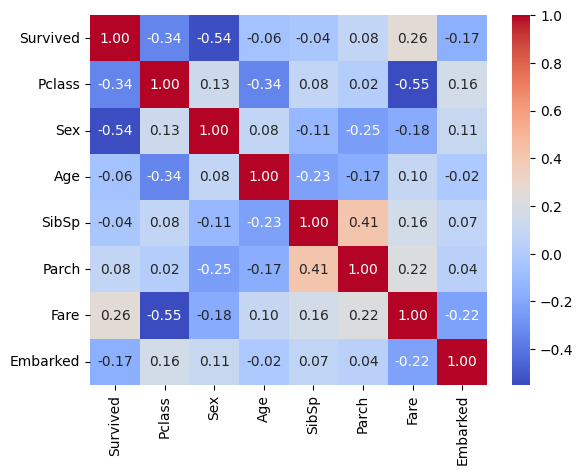

In [6]:
# Correlation matrix
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [7]:
# Split the data into features (X) and target (y)
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [8]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8212290502793296
Confusion Matrix:
[[92 13]
 [19 55]]
Precision: 0.8088235294117647
Recall: 0.7432432432432432
F1 Score: 0.7746478873239436


In [9]:
# Feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot feature importance using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x=feature_df["Importance"], y=feature_df["Feature"], orientation='h',
                     marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1))))

fig.update_layout(title="Feature Importance",
                  xaxis=dict(title="Importance"),
                  yaxis=dict(title="Feature"),
                  bargap=0.1,
                  bargroupgap=0.3)

fig.show()
